In [ ]:
# 설명: 이미지 처리에 필요한 라이브러리를 설치 및 불러옵니다.
# Colab에는 대부분 설치되어 있지만, opencv-python이 없을 경우 아래 명령어를 실행하세요.
# !pip install opencv-python
!pip install ipywidgets
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00


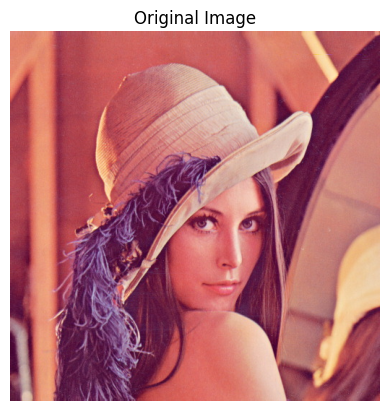

In [ ]:
# 설명: 이미지를 Colab 환경에 업로드하고, 올바르게 불러왔는지 시각화합니다.

# from google.colab import files
# uploaded = files.upload()  # candies.png 파일을 직접 업로드하세요.

# 이미지 읽기
src = cv2.imread('lenna.bmp')
if src is None:
    print('Image load failed!')
else:
    # BGR 이미지를 RGB로 변환하여 출력
    plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

In [ ]:
# 설명: 이미지를 HSV 색공간으로 변환합니다.
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
print('이미지가 HSV 색공간으로 변환되었습니다.')

이미지가 HSV 색공간으로 변환되었습니다.


HSV 색공간은 색상(Hue), 채도(Saturation), 명도(Value)로 이미지를 표현합니다.
색상별 마스킹이나 추출에 유리합니다.

In [ ]:
# 설명: 슬라이더를 이용해서 원하는 색상 범위를 선택하면 해당 색상만 추출하여 표시합니다.

def show_mask(hmin, hmax):
    # HSV 범위를 이용해 마스크 생성
    mask = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    masked_img = cv2.bitwise_and(src, src, mask=mask)

    # 결과 시각화
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(mask, cmap='gray')
    axes[0].set_title('Mask')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Extracted Color Region')
    axes[1].axis('off')
    plt.show()

# 슬라이더 위젯 생성
hmin_slider = widgets.IntSlider(value=50, min=0, max=179, step=1, description='H_min')
hmax_slider = widgets.IntSlider(value=80, min=0, max=179, step=1, description='H_max')
ui = widgets.HBox([hmin_slider, hmax_slider])
out = widgets.interactive_output(show_mask, {'hmin': hmin_slider, 'hmax': hmax_slider})

display(ui, out)

Output()

슬라이더를 움직이며 Hue(색상) 범위를 지정하면 해당 범위에 있는 색상만 검출되어 마스크와 추출된 이미지를 확인할 수 있습니다.

노란색은 hmin=20, hmax=40, 파란색은 hmin=100, hmax=120 등으로 조정해볼 수 있습니다.

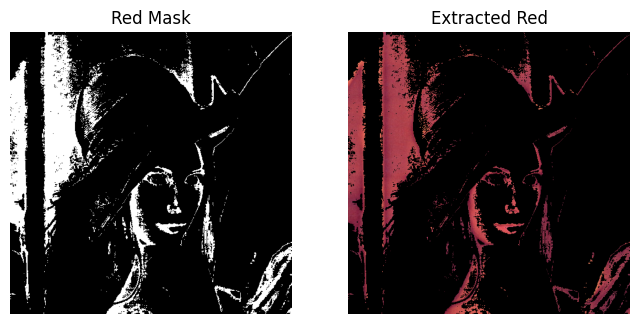

In [ ]:
# 설명: 빨간색처럼 Hue 값이 경계선(0~5, 175~179)에 걸쳐있는 경우는 두 개의 마스크를 만들어 합칩니다.

def extract_red():
    # 빨간색은 Hue가 0~10 또는 170~179에 분포
    lower_red1 = np.array([0, 150, 0])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 150, 0])
    upper_red2 = np.array([179, 255, 255])

    mask1 = cv2.inRange(src_hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(src_hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    masked_img = cv2.bitwise_and(src, src, mask=mask)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(mask, cmap='gray')
    plt.title('Red Mask')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    plt.title('Extracted Red')
    plt.axis('off')
    plt.show()

extract_red()

빨간색처럼 Hue 값이 0에 가깝거나 180에 가까운 색상은 두 개의 범위로 나누어 마스크를 만들고, 두 마스크를 합쳐서 추출합니다.